## Import resources

In [1]:
import cv2
import time
import math
import sklearn
import numpy as np
%matplotlib inline
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

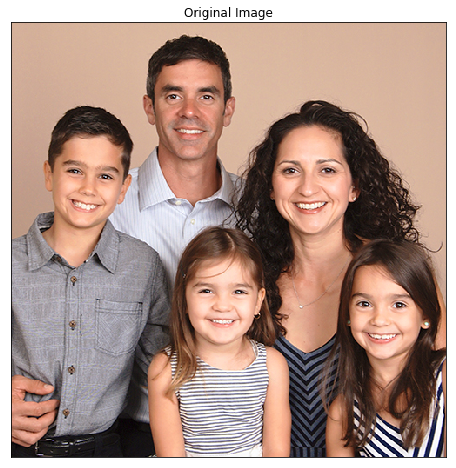

In [2]:
# Load in color image for face detection
image = cv2.imread('images/family.jpg')

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot our image using subplots to specify a size and title
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Original Image')
ax1.imshow(image)

## Preprocess the image and detect faces

Number of faces detected: 5


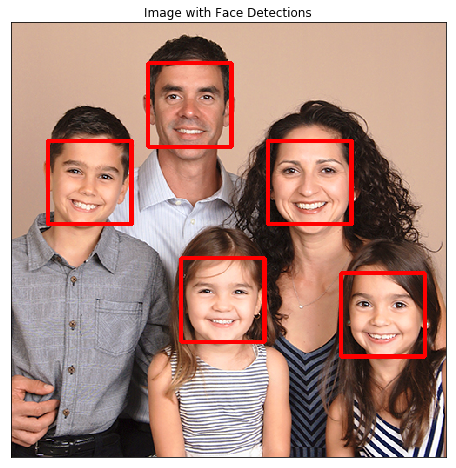

In [3]:
# Convert the RGB  image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('haar_detectors/haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(gray, 4, 6)

# Print the number of faces detected in the image
print('Number of faces detected:', len(faces))

# Make a copy of the orginal image to draw face detections on
image_with_detections = np.copy(image)

# Get the bounding box for each detected face
for (x,y,w,h) in faces:
    # Add a red bounding box to the detections image
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
    

# Display the image with the detections
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Image with Face Detections')
ax1.imshow(image_with_detections)

## Preprocess the image and detect faces and eyes

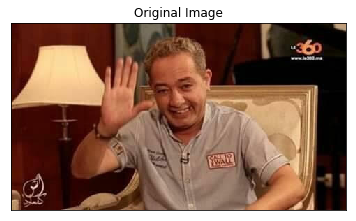

In [4]:
# Load in color image for face detection
image = cv2.imread('images/boubker.jpg')

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot the RGB image
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Original Image')
ax1.imshow(image)

Number of faces detected: 1


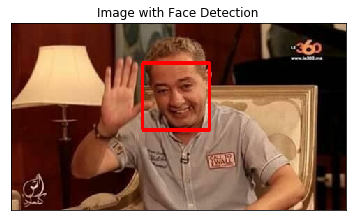

In [5]:
# Convert the RGB  image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('haar_detectors/haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(gray, 1.25, 6)

# Print the number of faces detected in the image
print('Number of faces detected:', len(faces))

# Make a copy of the orginal image to draw face detections on
image_with_detections = np.copy(image)

# Get the bounding box for each detected face
for (x,y,w,h) in faces:
    # Add a red bounding box to the detections image
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
    

# Display the image with the detections
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Image with Face Detection')
ax1.imshow(image_with_detections)

In [6]:
def face_eye_detector(image, eye=True, display=True):
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    denoised_image = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
    image_b = np.copy(denoised_image)
    gray = cv2.cvtColor(image_b, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, 1.25, 6)

    for (x,y,w,h) in faces:
        cv2.rectangle(image_b,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = image_b[y:y+h, x:x+w]
        if eye == True :
            eyes = eye_cascade.detectMultiScale(roi_gray)
            for (ex,ey,ew,eh) in eyes:
                cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

    if display == True :
        # Display the image with the detections
        plt.figure()
        plt.title('Image with Face and eye Detections')
        plt.imshow(image_b)
        plt.show()

    return image_b, roi_color, faces

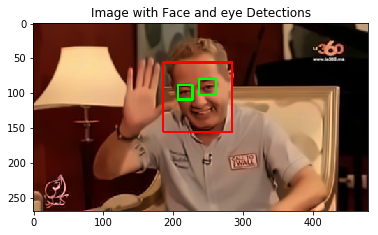

In [7]:
# Load in color image for face detection
image = cv2.imread('images/boubker.jpg')

# Make a copy of the original image to plot rectangle detections
image_with_detections = np.copy(image)   
  
# Add eye detection, using haarcascade_eye.xml, to the current face detector algorithm
# Loop over the eye detections and draw their corresponding boxes in green on image_with_detections
eye_cascade = cv2.CascadeClassifier('haar_detectors/haarcascade_eye.xml')


image_b, roi_color, faces = face_eye_detector(image_with_detections)